In [0]:
from sklearn.datasets import make_classification,make_circles
import matplotlib.pyplot as plt

In [0]:
#X,Y = make_classification(n_samples=400, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=1, weights=None, flip_y=0.01, class_sep=1.0, hypercube=True, shift=0.0, scale=1.0, shuffle=True, random_state=3)
X,Y = make_circles(n_samples=400, noise=0.05)

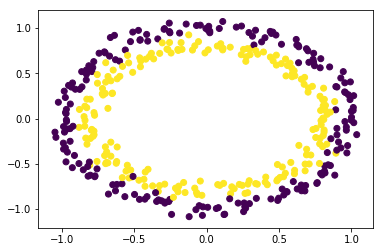

In [36]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [49]:
YOHT = to_categorical(Y)
print(Y.shape)
#print(YOHT.shape)
#print(YOHT)

(400,)


In [84]:
# Build a Single Neuron Network 
model = Sequential()
model.add(Dense(8,input_shape=(2,),activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(2,activation='softmax'))
model.summary()

# Compile
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 8)                 24        
_________________________________________________________________
dense_19 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_20 (Dense)             (None, 2)                 10        
Total params: 70
Trainable params: 70
Non-trainable params: 0
_________________________________________________________________


In [85]:
# Training 
hist = model.fit(X,YOHT,epochs=200,verbose=1,validation_split=0.2)

Train on 320 samples, validate on 80 samples
Epoch 1/200
320/320 [==============================] - 0s 1ms/step - loss: 0.7312 - acc: 0.4906 - val_loss: 0.7251 - val_acc: 0.5375
Epoch 2/200
320/320 [==============================] - 0s 51us/step - loss: 0.7244 - acc: 0.4906 - val_loss: 0.7207 - val_acc: 0.5375
Epoch 3/200
320/320 [==============================] - 0s 62us/step - loss: 0.7176 - acc: 0.4875 - val_loss: 0.7183 - val_acc: 0.5125
Epoch 4/200
320/320 [==============================] - 0s 47us/step - loss: 0.7147 - acc: 0.4719 - val_loss: 0.7157 - val_acc: 0.5000
Epoch 5/200
320/320 [==============================] - 0s 46us/step - loss: 0.7101 - acc: 0.4969 - val_loss: 0.7143 - val_acc: 0.4750
Epoch 6/200
320/320 [==============================] - 0s 49us/step - loss: 0.7081 - acc: 0.4594 - val_loss: 0.7124 - val_acc: 0.3875
Epoch 7/200
320/320 [==============================] - 0s 50us/step - loss: 0.7058 - acc: 0.3688 - val_loss: 0.7114 - val_acc: 0.4125
Epoch 8/200
320/32

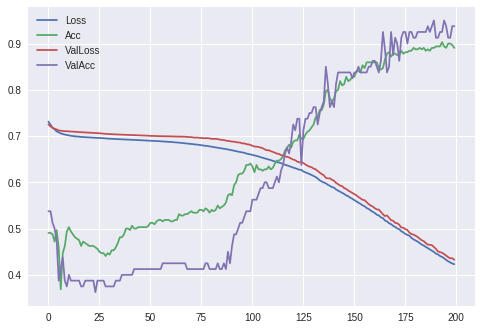

In [86]:
train_acc = hist.history['acc']
loss = hist.history['loss']
val_acc  = hist.history['val_acc']
val_loss = hist.history['val_loss']

plt.plot(loss,label="Loss")
plt.plot(train_acc,label="Acc")
plt.plot(val_loss,label="ValLoss")
plt.plot(val_acc,label="ValAcc")
plt.legend()
plt.show()

In [87]:
np.argmax(model.predict(X),axis=1)

array([1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,

In [88]:
test_loss,test_acc = model.evaluate(X,YOHT,verbose=0)
print(test_acc)

0.9075


In [0]:
#!wget https://raw.githubusercontent.com/coding-blocks-archives/PythonDTUWorkshopJuly2019/master/Day-3%20Deep%20Learning/visualize.py

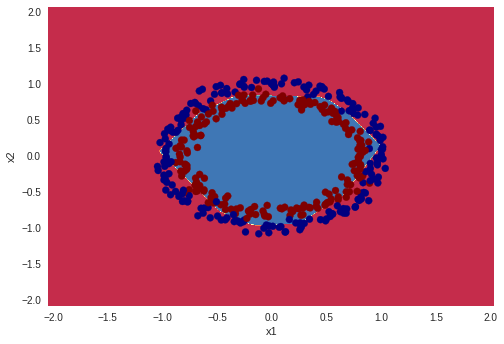

In [90]:
from visualize import *

plot_decision_boundary(lambda x:np.argmax(model.predict(x),axis=1),X,Y)

In [0]:
def softmax_numpy(scores):
  return np.exp(scores)/np.sum(np.exp(scores), axis=0)

In [26]:
a = np.array([1,2])
softmax_numpy(a)


array([0.26894142, 0.73105858])